### Questions: Does Covid_19 has any impact on realestate market?

### Method: Use yearly and quarterly data and create scattor plot of increase of median sold price, median rent price and median listing price.

### Conclusions: If we only look at the yearly data, there are not much of the changes happen, even we can see slightly increase, but once we dig a little bit more, the final results shows that during the covid, even the median of the median sell price has not been impacted, but the IQR  and the 25th of the quartile have been impact, which means the property market does has some impact by Covid.

In [94]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import MultipleLocator
import pandas as pd
import numpy as np
from scipy.stats import linregress
import csv

In [41]:
yearly_data_2019 = pd.read_csv("Resources/yearly_data_clean_2019.csv")
yearly_data_2020 = pd.read_csv("Resources/yearly_data_clean_2020.csv")
yearly_data_2021 = pd.read_csv("Resources/yearly_data_clean_2021.csv")
yearly_data_2019.head()

,Postcode,Suburb,ID_Domain,medianSoldPrice,numberSold,highestSoldPrice,lowestSoldPrice,5thPercentileSoldPrice,25thPercentileSoldPrice,75thPercentileSoldPrice,...,medianSaleListingPrice,numberSaleListing,highestSaleListingPrice,lowestSaleListingPrice,auctionNumberAuctioned,auctionNumberSold,medianRentListingPrice,numberRentListing,highestRentListingPrice,lowestRentListingPrice
0,3067,Abbotsford,627,990000.0,57.0,2425000.0,370000.0,661000.0,808000.0,1445000.0,...,1150000.0,71.0,2573000.0,115000.0,50.0,26.0,645.0,150.0,1250.0,400.0
1,3040,Aberfeldie,647,1368000.0,244.0,8000000.0,297000.0,480000.0,876000.0,1820000.0,...,1300000.0,285.0,8000000.0,280000.0,182.0,94.0,525.0,373.0,1400.0,250.0
2,3042,Airport West,757,953000.0,74.0,1500000.0,480000.0,610000.0,800000.0,1100000.0,...,953000.0,98.0,1470000.0,500000.0,62.0,24.0,475.0,125.0,1350.0,260.0
3,3021,Albanvale,787,596000.0,348.0,1400000.0,300000.0,410000.0,510000.0,650000.0,...,599000.0,532.0,2500000.0,60000.0,132.0,41.0,360.0,521.0,1647.0,190.0
4,3206,Albert Park,797,2575000.0,55.0,8600000.0,735000.0,1353000.0,1990000.0,3650000.0,...,2425000.0,52.0,13000000.0,315000.0,37.0,17.0,840.0,95.0,2000.0,350.0


<Figure size 1080x720 with 0 Axes>

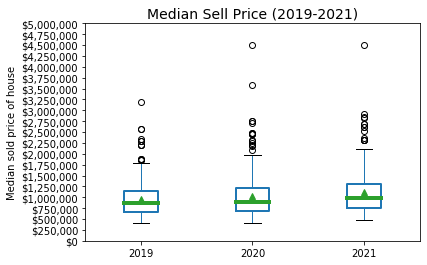

In [98]:
plt.figure(figsize=(15, 10))
y_major_locator=MultipleLocator(250000)
boxprops = dict(linestyle='-', linewidth=2, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='k')
DF = pd.DataFrame({'2019': yearly_data_2019["medianSoldPrice"], '2020': yearly_data_2020["medianSoldPrice"],'2021': yearly_data_2021["medianSoldPrice"]})

DF[['2019', '2020', '2021']].plot(kind='box', showmeans=True, showfliers=True, boxprops=boxprops, medianprops=medianprops)
ax=plt.gca()
ax.yaxis.set_major_locator(y_major_locator)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.ylim(0, 5000000)
plt.title('Median Sell Price (2019-2021)', size = 14)
plt.ylabel("Median sold price of house")
plt.savefig("Savefig/Median Sell Price (2019-2021).png")
plt.show()

<Figure size 720x720 with 0 Axes>

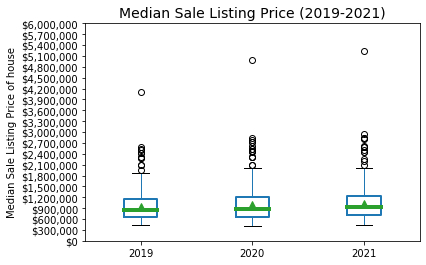

In [96]:
plt.figure(figsize=(15, 10))
y_major_locator=MultipleLocator(300000)
boxprops = dict(linestyle='-', linewidth=2, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='k')
DF = pd.DataFrame({'2019': yearly_data_2019["medianSaleListingPrice"], '2020': yearly_data_2020["medianSaleListingPrice"],'2021': yearly_data_2021["medianSaleListingPrice"]})

DF[['2019', '2020', '2021']].plot(kind='box', showmeans=True,showfliers=True, boxprops=boxprops, medianprops=medianprops)
ax=plt.gca()
ax.yaxis.set_major_locator(y_major_locator)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.ylim(0, 6000000)
plt.title('Median Sale Listing Price (2019-2021)', size = 14)
plt.ylabel("Median Sale Listing Price of house")
plt.savefig("Savefig/Median Sale Listing Price (2019-2021).png")
plt.show()

<Figure size 720x720 with 0 Axes>

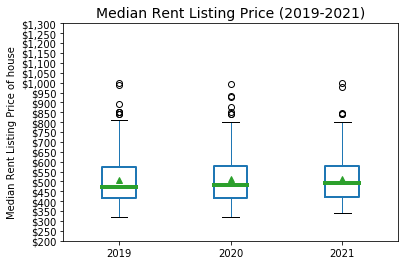

In [97]:
plt.figure(figsize=(15, 10))
y_major_locator=MultipleLocator(50)
boxprops = dict(linestyle='-', linewidth=2, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='k')
DF = pd.DataFrame({'2019': yearly_data_2019["medianRentListingPrice"], '2020': yearly_data_2020["medianRentListingPrice"],'2021': yearly_data_2021["medianRentListingPrice"]})

DF[['2019', '2020', '2021']].plot(kind='box', showmeans=True, showfliers=True, boxprops=boxprops, medianprops=medianprops)
ax=plt.gca()
ax.yaxis.set_major_locator(y_major_locator)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.ylim(200, 1300)
plt.title('Median Rent Listing Price (2019-2021)', size = 14)
plt.ylabel("Median Rent Listing Price of house")
plt.savefig("Savefig/Median Rent Listing Price (2019-2021).png")
plt.show()

In [100]:
quarter_data_2019_1st = pd.read_csv("Resources/raw_data/quarter_data_2019_1st.csv")
quarter_data_2019_2nd = pd.read_csv("Resources/raw_data/quarter_data_2019_2nd.csv")
quarter_data_2019_3rd = pd.read_csv("Resources/raw_data/quarter_data_2019_3rd.csv")
quarter_data_2019_4th = pd.read_csv("Resources/raw_data/quarter_data_2019_4th.csv")
quarter_data_2020_1st = pd.read_csv("Resources/raw_data/quarter_data_2020_1st.csv")
quarter_data_2020_2nd = pd.read_csv("Resources/raw_data/quarter_data_2020_2nd.csv")
quarter_data_2020_3rd = pd.read_csv("Resources/raw_data/quarter_data_2020_3rd.csv")
quarter_data_2020_4th = pd.read_csv("Resources/raw_data/quarter_data_2020_4th.csv")
quarter_data_2021_1st = pd.read_csv("Resources/raw_data/quarter_data_2021_1st.csv")
quarter_data_2021_2nd = pd.read_csv("Resources/raw_data/quarter_data_2021_2nd.csv")


<Figure size 1080x720 with 0 Axes>

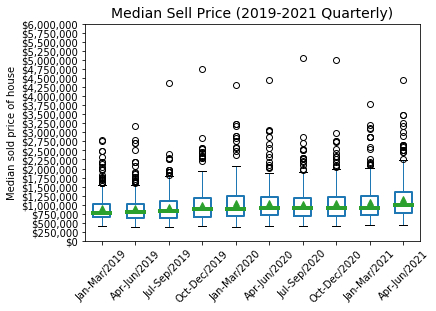

In [106]:
plt.figure(figsize=(15, 10))
y_major_locator=MultipleLocator(250000)
boxprops = dict(linestyle='-', linewidth=2, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='k')
DF = pd.DataFrame({'Jan-Mar/2019': quarter_data_2019_1st["medianSoldPrice"], 
                   'Apr-Jun/2019': quarter_data_2019_2nd["medianSoldPrice"],
                   'Jul-Sep/2019': quarter_data_2019_3rd["medianSoldPrice"],
                  'Oct-Dec/2019':quarter_data_2019_4th["medianSoldPrice"],
                  "Jan-Mar/2020":quarter_data_2020_1st["medianSoldPrice"],
                  "Apr-Jun/2020":quarter_data_2020_2nd["medianSoldPrice"],
                  "Jul-Sep/2020":quarter_data_2020_3rd["medianSoldPrice"],
                  "Oct-Dec/2020":quarter_data_2020_4th["medianSoldPrice"],
                  "Jan-Mar/2021":quarter_data_2021_1st["medianSoldPrice"],
                  'Apr-Jun/2021':quarter_data_2021_2nd["medianSoldPrice"]})
#xlabel = ['Jan-Mar/2019','Apr-Jun/2019', 'Jul-Sep/2019', 'Oct-Dec/2019', 'Jan-Mar/2020', 'Apr-Jun/2020', 'Jul-Sep/2020', 'Oct-Dec/2020', 'Jan-Mar/2021', 'Apr-Jun/2021']
DF[['Jan-Mar/2019','Apr-Jun/2019', 'Jul-Sep/2019', 'Oct-Dec/2019', 'Jan-Mar/2020', 'Apr-Jun/2020', 'Jul-Sep/2020', 'Oct-Dec/2020', 'Jan-Mar/2021', 'Apr-Jun/2021']].plot(kind='box', showmeans=True, showfliers=True, boxprops=boxprops, medianprops=medianprops, rot=45)
ax=plt.gca()
ax.yaxis.set_major_locator(y_major_locator)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.ylim(0, 6000000)
plt.title('Median Sell Price (2019-2021 Quarterly)', size = 14)
plt.ylabel("Median sold price of house")
plt.savefig("Savefig/Median Sell Price (2019-2021 Quarterly).png")
plt.show()